# Cardekho Price Prediction

###### Dataset: https://www.kaggle.com/datasets/manishkr1754/cardekho-used-car-data/data

The used car market in India is a dynamic and ever-changing landscape. Prices can fluctuate wildly based on a variety of factors including the make and model of the car, its mileage, its condition and the current market conditions. As a result, it can be difficult for sellers to accurately price their cars.

This dataset contains information about used cars.
This data can be used for a lot of purposes such as Used Car Price Prediction using different Machine Learning Techniques.

#### Data Description (Feature Information)

- `car_name`: Car's Full name, which includes brand and specific model name.
- `brand`: Brand Name of the particular car.
- `model`: Exact model name of the car of a particular brand.
- `seller_type`: Which Type of seller is selling the used car
- `fuel_type`: Fuel used in the used car, which was put up on sale.
- `transmission_type`: Transmission used in the used car, which was put on sale.
- `vehicle_age`: The count of years since car was bought.
- `mileage`: It is the number of kilometer the car runs per litre.
- `engine`: It is the engine capacity in cc(cubic centimeters)
- `max_power`: Max power it produces in BHP.
- `seats`: Total number of seats in car.
- `selling_price`: The sale price which was put up on website.

In [1]:
import time
start_time = time.time()

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

# Dataset

In [4]:
df0 = pd.read_csv('cardekho_dataset.csv.zip')
df = df0.copy()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         15411 non-null  int64  
 1   car_name           15411 non-null  object 
 2   brand              15411 non-null  object 
 3   model              15411 non-null  object 
 4   vehicle_age        15411 non-null  int64  
 5   km_driven          15411 non-null  int64  
 6   seller_type        15411 non-null  object 
 7   fuel_type          15411 non-null  object 
 8   transmission_type  15411 non-null  object 
 9   mileage            15411 non-null  float64
 10  engine             15411 non-null  int64  
 11  max_power          15411 non-null  float64
 12  seats              15411 non-null  int64  
 13  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 1.6+ MB


In [6]:
df.head()

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


# Data Cleaning

In [7]:
df.isna().sum()

Unnamed: 0           0
car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

# Drop Irrelevant Columns

In [8]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [9]:
df.columns.tolist()

['car_name',
 'brand',
 'model',
 'vehicle_age',
 'km_driven',
 'seller_type',
 'fuel_type',
 'transmission_type',
 'mileage',
 'engine',
 'max_power',
 'seats',
 'selling_price']

## car_name

In [10]:
df.drop('car_name', axis=1, inplace=True)

In [11]:
df.columns.tolist()

['brand',
 'model',
 'vehicle_age',
 'km_driven',
 'seller_type',
 'fuel_type',
 'transmission_type',
 'mileage',
 'engine',
 'max_power',
 'seats',
 'selling_price']

## brand

In [12]:
df.drop('brand', axis=1, inplace=True)

In [13]:
df.columns.tolist()

['model',
 'vehicle_age',
 'km_driven',
 'seller_type',
 'fuel_type',
 'transmission_type',
 'mileage',
 'engine',
 'max_power',
 'seats',
 'selling_price']

## model

In [14]:
df['model'].value_counts()

model
i20             906
Swift Dzire     890
Swift           781
Alto            778
City            757
               ... 
Altroz            1
C                 1
Ghost             1
Quattroporte      1
Gurkha            1
Name: count, Length: 120, dtype: int64

In [15]:
df['model'].unique()

array(['Alto', 'Grand', 'i20', 'Ecosport', 'Wagon R', 'i10', 'Venue',
       'Swift', 'Verna', 'Duster', 'Cooper', 'Ciaz', 'C-Class', 'Innova',
       'Baleno', 'Swift Dzire', 'Vento', 'Creta', 'City', 'Bolero',
       'Fortuner', 'KWID', 'Amaze', 'Santro', 'XUV500', 'KUV100', 'Ignis',
       'RediGO', 'Scorpio', 'Marazzo', 'Aspire', 'Figo', 'Vitara',
       'Tiago', 'Polo', 'Seltos', 'Celerio', 'GO', '5', 'CR-V',
       'Endeavour', 'KUV', 'Jazz', '3', 'A4', 'Tigor', 'Ertiga', 'Safari',
       'Thar', 'Hexa', 'Rover', 'Eeco', 'A6', 'E-Class', 'Q7', 'Z4', '6',
       'XF', 'X5', 'Hector', 'Civic', 'D-Max', 'Cayenne', 'X1', 'Rapid',
       'Freestyle', 'Superb', 'Nexon', 'XUV300', 'Dzire VXI', 'S90',
       'WR-V', 'XL6', 'Triber', 'ES', 'Wrangler', 'Camry', 'Elantra',
       'Yaris', 'GL-Class', '7', 'S-Presso', 'Dzire LXI', 'Aura', 'XC',
       'Ghibli', 'Continental', 'CR', 'Kicks', 'S-Class', 'Tucson',
       'Harrier', 'X3', 'Octavia', 'Compass', 'CLS', 'redi-GO', 'Glanza',
       

# vehicle_age

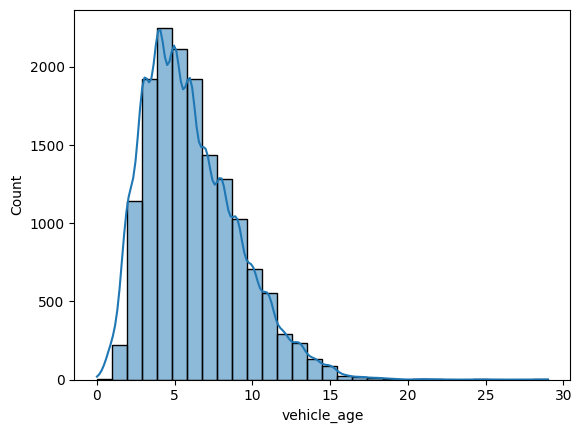

In [16]:
sns.histplot(data=df, x='vehicle_age', kde=True, bins=30);

## km_driven

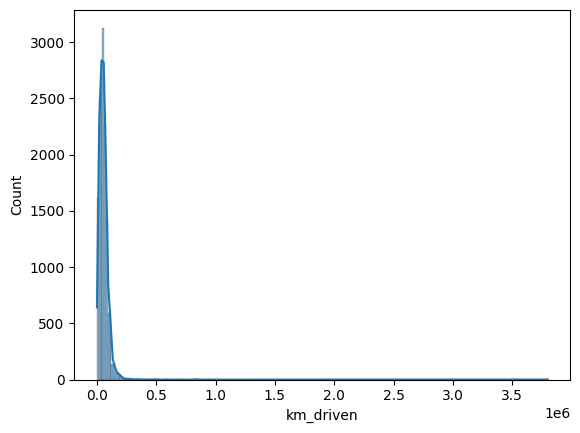

In [17]:
sns.histplot(data=df,x='km_driven',kde=True);

## seller_type

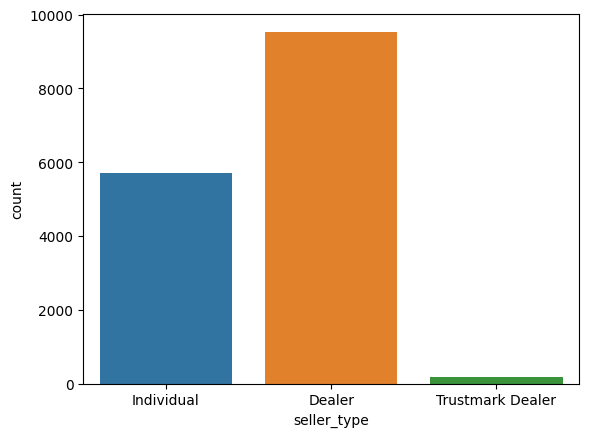

In [18]:
sns.countplot(data=df,x='seller_type',palette='tab10');

## fuel_type

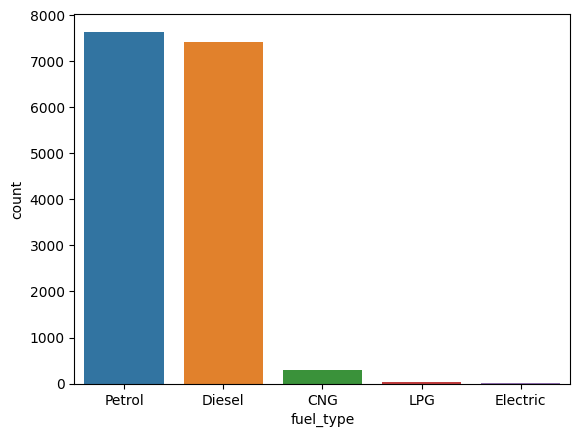

In [19]:
sns.countplot(data=df,x='fuel_type',palette='tab10');

## transmission_type

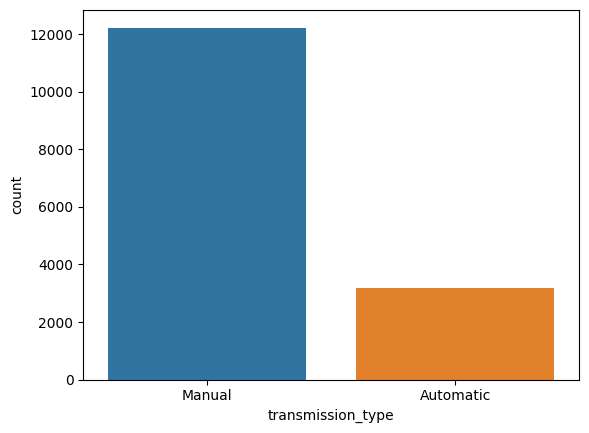

In [20]:
sns.countplot(data=df,x='transmission_type',palette='tab10');

## mileage

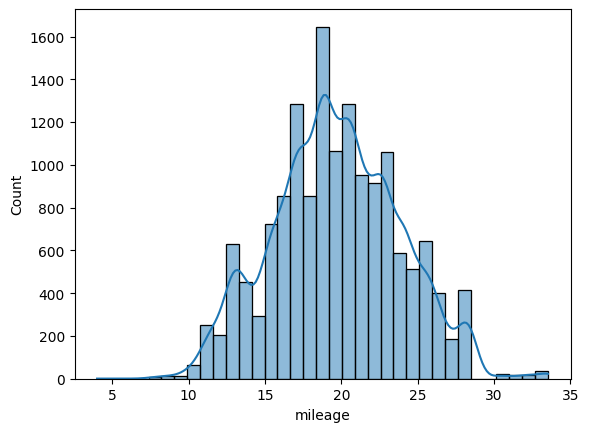

In [21]:
sns.histplot(data=df,x='mileage',kde=True,bins=35);

## engine

In [22]:
df['engine'].unique()

array([ 796, 1197,  998, 1498, 1582, 1461, 1998, 1248, 2143, 2494, 1598,
       1497, 2523, 2982,  999, 1199, 1086, 2179, 1396, 1198, 1590, 1997,
       1493, 1120, 1196, 1186, 1061,  799, 1796, 2993, 1298, 3198, 1995,
       1373, 1591, 1968, 1399, 1047, 1353, 2755, 1395, 2498, 1999, 2953,
       2393, 2967, 2998, 2995, 1956, 1462, 1799, 2499, 1451, 1194, 1798,
       2694, 1496, 1969, 2487, 3604, 1499, 2987, 1599, 2354, 1950, 2148,
       4134, 2400, 1984, 2979, 2609, 2092, 5998, 1330, 2956, 3598, 2362,
        793, 1368, 3597, 1991, 5461, 1343, 2497, 4367, 1797, 3498, 2698,
       1896, 2999, 3855, 4806, 1985, 2771, 2157, 3628, 2198, 2996, 2199,
       4395, 3456, 4663, 2773, 6592, 2495, 1781, 2997, 1597, 2596, 4163])

## max_power

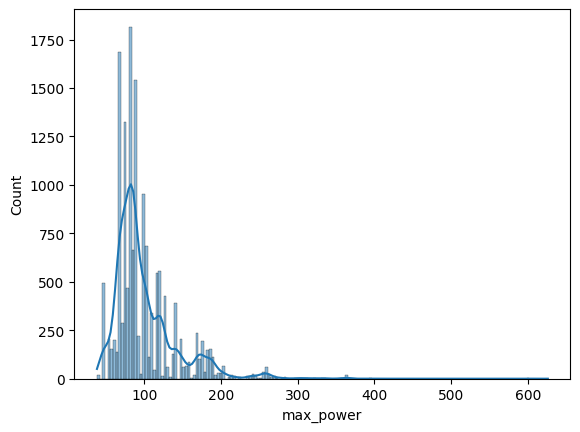

In [23]:
sns.histplot(data=df,x='max_power',kde=True);

## seats

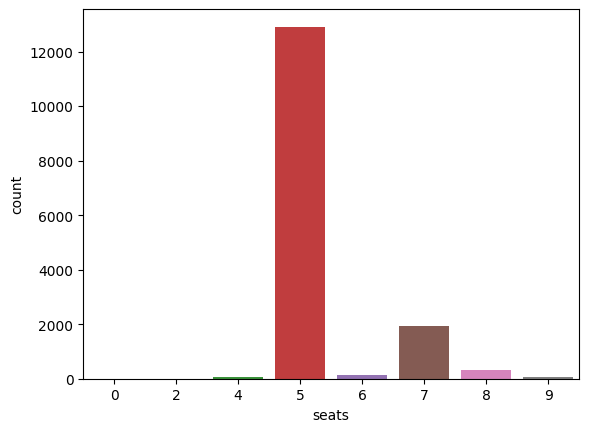

In [24]:
sns.countplot(data=df,x='seats',palette='tab10');

## selling_price

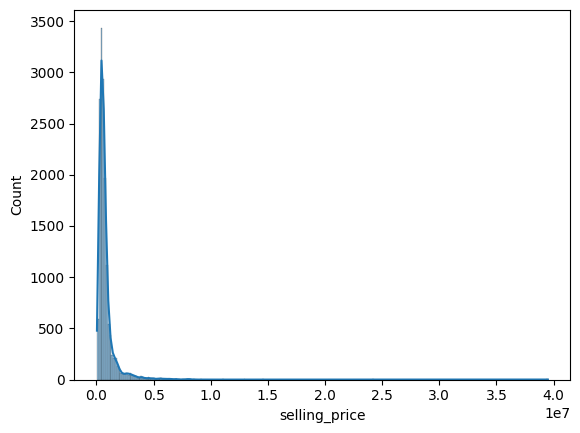

In [25]:
sns.histplot(data=df,x='selling_price',kde=True);

---

## Feature Engineering

In [26]:
df.head()

,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


### Get Numerical Features

In [27]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O' ]
print('num_features: ', len(num_features))

num_features:  7


### Get Categorical Features

In [28]:
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('cat_features: ', len(cat_features))

cat_features:  4


### Get Discrete Features

In [29]:
discrete_features = [feature for feature in num_features if len(df[feature].unique()) <= 25]
print('discrete_features: ', len(discrete_features))

discrete_features:  2


### Get Continuous Features

In [30]:
continuous_features = [features for features in num_features if features not in discrete_features]
print('continuous_features: ', len(continuous_features))

continuous_features:  5


## Declare Dependent Feature & Independent Features

In [31]:
X = df.drop('selling_price', axis=1)

In [32]:
X.head()

,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats
0,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5
1,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5
2,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5
3,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5
4,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5


In [33]:
y = df['selling_price']

In [34]:
y.head()

0    120000
1    550000
2    215000
3    226000
4    570000
Name: selling_price, dtype: int64

---

# Train Test Split

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [37]:
X_train.shape, X_test.shape

((12328, 10), (3083, 10))

In [38]:
y_train.shape, y_test.shape

((12328,), (3083,))

In [39]:
X_train.head()

,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats
11210,XC60,7,70252,Dealer,Diesel,Automatic,11.20,2400,215.0,5
1347,Tiago,2,10000,Individual,Petrol,Manual,23.84,1199,84.0,5
10363,CLS,2,6000,Dealer,Diesel,Automatic,19.00,1950,241.3,5
316,City,7,63000,Dealer,Petrol,Manual,17.80,1497,117.3,5
10638,i10,10,80292,Dealer,Petrol,Manual,20.36,1197,78.9,5


In [40]:
X_test.head()

,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats
3334,i10,12,73000,Dealer,Petrol,Manual,20.36,1197,78.90,5
10928,Baleno,4,58000,Individual,Diesel,Manual,27.39,1248,74.00,5
2518,Ertiga,7,96000,Dealer,Diesel,Manual,20.77,1248,88.76,7
11322,City,1,4500,Dealer,Petrol,Automatic,18.40,1498,119.35,5
9394,Alto,11,62000,Dealer,Petrol,Manual,19.70,796,46.30,5


In [41]:
y_train.head()

11210    1825000
1347      515000
10363    7500000
316       435000
10638     200000
Name: selling_price, dtype: int64

In [42]:
y_test.head()

3334      190000
10928     600000
2518      665000
11322    1570000
9394      160000
Name: selling_price, dtype: int64

## Feature Transformation

In [43]:
num_features = X_train.select_dtypes(exclude='object').columns

In [44]:
num_features

Index(['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats'], dtype='object')

In [45]:
oh_cols = ['seller_type','fuel_type','transmission_type']

In [46]:
len(X_train['seller_type'].unique())

3

In [47]:
len(X_train['fuel_type'].unique())

5

In [48]:
len(X_train['transmission_type'].unique())

2

### Feature Encoding

In [49]:
from sklearn.preprocessing import TargetEncoder

In [50]:
te = TargetEncoder(target_type='auto', smooth='auto', cv=5)

In [51]:
len(X_train['model'].unique())

118

In [52]:
X_train.head()

,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats
11210,XC60,7,70252,Dealer,Diesel,Automatic,11.20,2400,215.0,5
1347,Tiago,2,10000,Individual,Petrol,Manual,23.84,1199,84.0,5
10363,CLS,2,6000,Dealer,Diesel,Automatic,19.00,1950,241.3,5
316,City,7,63000,Dealer,Petrol,Manual,17.80,1497,117.3,5
10638,i10,10,80292,Dealer,Petrol,Manual,20.36,1197,78.9,5


In [53]:
X_train['model'] = te.fit_transform(X_train[['model']],y_train)

In [54]:
X_train.head()

,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats
11210,0.0,7,70252,Dealer,Diesel,Automatic,11.20,2400,215.0,5
1347,0.0,2,10000,Individual,Petrol,Manual,23.84,1199,84.0,5
10363,0.0,2,6000,Dealer,Diesel,Automatic,19.00,1950,241.3,5
316,0.0,7,63000,Dealer,Petrol,Manual,17.80,1497,117.3,5
10638,0.0,10,80292,Dealer,Petrol,Manual,20.36,1197,78.9,5


In [55]:
X_test.head()

,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats
3334,i10,12,73000,Dealer,Petrol,Manual,20.36,1197,78.90,5
10928,Baleno,4,58000,Individual,Diesel,Manual,27.39,1248,74.00,5
2518,Ertiga,7,96000,Dealer,Diesel,Manual,20.77,1248,88.76,7
11322,City,1,4500,Dealer,Petrol,Automatic,18.40,1498,119.35,5
9394,Alto,11,62000,Dealer,Petrol,Manual,19.70,796,46.30,5


In [56]:
X_test['model'] = te.transform(X_test[['model']])

In [57]:
X_test.head()

,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats
3334,0.0,12,73000,Dealer,Petrol,Manual,20.36,1197,78.90,5
10928,0.0,4,58000,Individual,Diesel,Manual,27.39,1248,74.00,5
2518,0.0,7,96000,Dealer,Diesel,Manual,20.77,1248,88.76,7
11322,0.0,1,4500,Dealer,Petrol,Automatic,18.40,1498,119.35,5
9394,0.0,11,62000,Dealer,Petrol,Manual,19.70,796,46.30,5


### Feature Scaling

In [58]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [59]:
from sklearn.compose import ColumnTransformer

In [60]:
X_train.head()

,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats
11210,0.0,7,70252,Dealer,Diesel,Automatic,11.20,2400,215.0,5
1347,0.0,2,10000,Individual,Petrol,Manual,23.84,1199,84.0,5
10363,0.0,2,6000,Dealer,Diesel,Automatic,19.00,1950,241.3,5
316,0.0,7,63000,Dealer,Petrol,Manual,17.80,1497,117.3,5
10638,0.0,10,80292,Dealer,Petrol,Manual,20.36,1197,78.9,5


In [61]:
numeric_transformer = StandardScaler()

In [62]:
oh_transformer = OneHotEncoder(drop='first')

In [63]:
preprocessor = ColumnTransformer([
    ('OneHotEncoder',oh_transformer,oh_cols),
    ('StandardScaler', numeric_transformer,num_features)
], remainder='passthrough')

In [64]:
preprocessor

,transformers,"[('OneHotEncoder', ...), ('StandardScaler', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,categories,'auto'
,drop,'first'
,sparse_output,True


In [65]:
X_train.head()

,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats
11210,0.0,7,70252,Dealer,Diesel,Automatic,11.20,2400,215.0,5
1347,0.0,2,10000,Individual,Petrol,Manual,23.84,1199,84.0,5
10363,0.0,2,6000,Dealer,Diesel,Automatic,19.00,1950,241.3,5
316,0.0,7,63000,Dealer,Petrol,Manual,17.80,1497,117.3,5
10638,0.0,10,80292,Dealer,Petrol,Manual,20.36,1197,78.9,5


### Apply Transformation

In [66]:
X_train = preprocessor.fit_transform(X_train)

In [67]:
X_train

array([[ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00, ...,
         2.68168531e+00, -4.03823711e-01,  0.00000000e+00],
       [ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -3.82744356e-01, -4.03823711e-01,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00, ...,
         3.29691050e+00, -4.03823711e-01,  0.00000000e+00],
       ...,
       [ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -7.79482730e-01, -4.03823711e-01,  2.12393134e-03],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -4.32804504e-01, -4.03823711e-01,  0.00000000e+00],
       [ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         6.75630567e-02, -4.03823711e-01,  0.00000000e+00]],
      shape=(12328, 14))

In [68]:
X_test = preprocessor.transform(X_test)

In [69]:
X_test

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -5.02046579e-01, -4.03823711e-01,  0.00000000e+00],
       [ 1.00000000e+00,  0.00000000e+00,  1.00000000e+00, ...,
        -6.16670284e-01, -4.03823711e-01,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00, ...,
        -2.71395614e-01,  2.07049970e+00,  0.00000000e+00],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -2.72799169e-01, -4.03823711e-01,  0.00000000e+00],
       [ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -7.79482730e-01, -4.03823711e-01,  1.69607865e-03],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00, ...,
        -2.72097391e-01, -4.03823711e-01,  0.00000000e+00]],
      shape=(3083, 14))

In [70]:
X_train

array([[ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00, ...,
         2.68168531e+00, -4.03823711e-01,  0.00000000e+00],
       [ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -3.82744356e-01, -4.03823711e-01,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00, ...,
         3.29691050e+00, -4.03823711e-01,  0.00000000e+00],
       ...,
       [ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -7.79482730e-01, -4.03823711e-01,  2.12393134e-03],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -4.32804504e-01, -4.03823711e-01,  0.00000000e+00],
       [ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         6.75630567e-02, -4.03823711e-01,  0.00000000e+00]],
      shape=(12328, 14))

---

# Model Training

In [71]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

In [72]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [73]:
def eval_model(y_true, y_predicted):
    mae = mean_absolute_error(y_true, y_predicted)
    mse = mean_squared_error(y_true, y_predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_predicted)
    adj_r2 = 1 - (1 - r2) * (len(y_true) - 1) / (len(y_true) - X_test.shape[1] -1)
    return mae, mse, rmse, r2, adj_r2

In [74]:
models = {
    'Linear Regression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'KNN Regressor': KNeighborsRegressor(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'AdaBoost Regressor': AdaBoostRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    'XGBoost Regressor': XGBRegressor()
}

In [75]:
for i in range(len(list(models))):

    model = list(models.values())[i]
    model.fit(X_train,y_train)


    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)


    model_train_mae, model_train_mse, model_train_rmse, model_train_r2, model_train_adjr2 = eval_model(y_train, y_train_pred)
    model_test_mae, model_test_mse, model_test_rmse, model_test_r2, model_test_adjr2 = eval_model(y_test, y_test_pred)


    print(list(models.keys())[i])
    print('\n')

    print('Model Performance: Train Set')
    print('- RMSE: {:.4f}'.format(model_train_rmse))
    print('- MSE: {:.4f}'.format(model_train_mse))
    print('- MAE: {:.4f}'.format(model_train_mae))
    print('- R2: {:.4f}'.format(model_train_r2))
    print('- ADJ_R2: {:.4f}'.format(model_train_adjr2))

    print('-'*35)

    print('Model Performance: Test Set')
    print('- RMSE: {:.4f}'.format(model_test_rmse))
    print('- MSE: {:.4f}'.format(model_test_mse))
    print('- MAE: {:.4f}'.format(model_test_mae))
    print('- R2: {:.4f}'.format(model_test_r2))
    print('- ADJ_R2: {:.4f}'.format(model_test_adjr2))

    print('='*35)
    print('\n')

Linear Regression


Model Performance: Train Set
- RMSE: 553076.9010
- MSE: 305894058474.7436
- MAE: 266290.0148
- R2: 0.6228
- ADJ_R2: 0.6224
-----------------------------------
Model Performance: Test Set
- RMSE: 501019.4651
- MSE: 251020504379.6821
- MAE: 277666.4556
- R2: 0.6665
- ADJ_R2: 0.6650


Lasso


Model Performance: Train Set
- RMSE: 553083.2661
- MSE: 305901099284.1977
- MAE: 266170.2935
- R2: 0.6228
- ADJ_R2: 0.6224
-----------------------------------
Model Performance: Test Set
- RMSE: 501034.0711
- MSE: 251035140372.8929
- MAE: 277585.4682
- R2: 0.6665
- ADJ_R2: 0.6650


Ridge


Model Performance: Train Set
- RMSE: 554158.0160
- MSE: 307091106741.6589
- MAE: 266807.9667
- R2: 0.6214
- ADJ_R2: 0.6209
-----------------------------------
Model Performance: Test Set
- RMSE: 502083.6258
- MSE: 252087967269.5100
- MAE: 278290.5415
- R2: 0.6651
- ADJ_R2: 0.6636


KNN Regressor


Model Performance: Train Set
- RMSE: 321558.0525
- MSE: 103399581145.3602
- MAE: 97672.1772
- R2: 0

---

# Hyperparameter Tuning

In [76]:
adb_params = {
    'n_estimators':[50,60,70,80],
    'loss':['linear','square','exponential']
}

In [77]:
gdb_params = {
    'loss':['squared_error','huber','absolute_error'],
    'criterion':['friedman_mse','squared_error','mse'],
    'min_samples_split':[2,8,15,20],
    'n_estimators':[100,200,500,1000],
    'max_depth':[None, range(5,16)],
    'learning_rate': [0.1,0.01,0.001,0.2,0.3]
}

In [78]:
knn_params = {
    'n_neighbors':[2,3,10,20,30,40,50] 
}

In [79]:
rf_params = {
    'max_depth':[None, list(range(5,11))],
    'max_features': [None, list(range(5,10))],
    'min_samples_split': [2,8,15,20],
    'n_estimators': [100,200,500,1000]
}

In [80]:
xgb_params = {
    'learning_rate':[0.1,0.01],
    'max_depth':[5,8,12,20,30],
    'n_estimators':[100,200,300],
    'colsample_bytree':[0.5,0.8,1,0.3,0.4]
}

In [81]:
rscv_models = [
    ('KNN Regressor', KNeighborsRegressor(), knn_params),
    ('Random Forest Regressor', RandomForestRegressor(), rf_params),
    ('Adaboost Regressor', AdaBoostRegressor(), adb_params),
    ('GradientBoostingRegressor', GradientBoostingRegressor(), gdb_params),
    ('XGB Regressor',XGBRegressor(), xgb_params)
]

In [82]:
from sklearn.model_selection import RandomizedSearchCV

In [83]:
model_param = {}

for name, model, params in rscv_models:

    rscv = RandomizedSearchCV(
        estimator=model,
        param_distributions=params,
        n_iter=100,
        cv=3,
        verbose=2,
        n_jobs=-1
    )

    rscv.fit(X_train,y_train)

    model_param[name] = rscv.best_params_

Fitting 3 folds for each of 7 candidates, totalling 21 fits
[CV] END ......................................n_neighbors=2; total time=   0.1s
[CV] END ......................................n_neighbors=2; total time=   0.1s
[CV] END ......................................n_neighbors=3; total time=   0.1s
[CV] END .....................................n_neighbors=10; total time=   0.1s
[CV] END .....................................n_neighbors=10; total time=   0.2s
[CV] END ......................................n_neighbors=2; total time=   0.1s
[CV] END ......................................n_neighbors=3; total time=   0.1s
[CV] END .....................................n_neighbors=40; total time=   0.2s
[CV] END .....................................n_neighbors=50; total time=   0.2s
[CV] END ......................................n_neighbors=3; total time=   0.1s
[CV] END .....................................n_neighbors=20; total time=   0.1s
[CV] END .....................................n_n

In [84]:
for model_name in model_param:
    print(f'------------------------ Best Params for {model_name} ------------------------------')
    print(model_param[model_name])
    print('='*40)
    print('\n')

------------------------ Best Params for KNN Regressor ------------------------------
{'n_neighbors': 10}


------------------------ Best Params for Random Forest Regressor ------------------------------
{'n_estimators': 100, 'min_samples_split': 2, 'max_features': None, 'max_depth': None}


------------------------ Best Params for Adaboost Regressor ------------------------------
{'n_estimators': 60, 'loss': 'linear'}


------------------------ Best Params for GradientBoostingRegressor ------------------------------
{'n_estimators': 500, 'min_samples_split': 2, 'max_depth': None, 'loss': 'absolute_error', 'learning_rate': 0.3, 'criterion': 'squared_error'}


------------------------ Best Params for XGB Regressor ------------------------------
{'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.4}




## Training the Best Models with the Best Hyperparameters

In [85]:
models = {
    'Random Forest Regressor': RandomForestRegressor(
        n_estimators=200,
        min_samples_split=2,
        max_features=None,
        max_depth=None
    ),
    'KNN Regressor': KNeighborsRegressor(
        n_neighbors=10,
        n_jobs=-1
    ),
    'AdaBoostRegressor': AdaBoostRegressor(
        n_estimators=50,
        loss='linear'
    ),
    'GradientBoostingRegressor': GradientBoostingRegressor(
        n_estimators=100, 
        min_samples_split=2, 
        max_depth=None, 
        loss='absolute_error', 
        learning_rate=0.3, 
        criterion='squared_error'
    ),
    'XGB Regressor': XGBRegressor(
        n_estimators=300, 
        max_depth=5, 
        learning_rate=0.1, 
        colsample_bytree=0.4
    )
}

In [86]:
for i in range(len(list(models))):

    model = list(models.values())[i]
    model.fit(X_train,y_train)


    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)


    model_train_mae, model_train_mse, model_train_rmse, model_train_r2, model_train_adjr2 = eval_model(y_train, y_train_pred)
    model_test_mae, model_test_mse, model_test_rmse, model_test_r2, model_test_adjr2 = eval_model(y_test, y_test_pred)


    print(list(models.keys())[i])

    print('Model Performance: Train Set')
    print('- RMSE: {:.4f}'.format(model_train_rmse))
    print('- MSE: {:.4f}'.format(model_train_mse))
    print('- MAE: {:.4f}'.format(model_train_mae))
    print('- R2: {:.4f}'.format(model_train_r2))
    print('- ADJ_R2: {:.4f}'.format(model_train_adjr2))

    print('-'*35)

    print('Model Performance: Test Set')
    print('- RMSE: {:.4f}'.format(model_test_rmse))
    print('- MSE: {:.4f}'.format(model_test_mse))
    print('- MAE: {:.4f}'.format(model_test_mae))
    print('- R2: {:.4f}'.format(model_test_r2))
    print('- ADJ_R2: {:.4f}'.format(model_test_adjr2))

    print('='*35)
    print('\n')

Random Forest Regressor
Model Performance: Train Set
- RMSE: 135996.8596
- MSE: 18495145807.5611
- MAE: 40588.4013
- R2: 0.9772
- ADJ_R2: 0.9772
-----------------------------------
Model Performance: Test Set
- RMSE: 238423.1518
- MSE: 56845599319.9009
- MAE: 105115.3033
- R2: 0.9245
- ADJ_R2: 0.9241


KNN Regressor
Model Performance: Train Set
- RMSE: 366698.9604
- MSE: 134468127552.7255
- MAE: 111466.1827
- R2: 0.8342
- ADJ_R2: 0.8340
-----------------------------------
Model Performance: Test Set
- RMSE: 270933.5343
- MSE: 73404980011.5553
- MAE: 126020.7995
- R2: 0.9025
- ADJ_R2: 0.9020


AdaBoostRegressor
Model Performance: Train Set
- RMSE: 483077.5718
- MSE: 233363940370.2113
- MAE: 377823.4493
- R2: 0.7123
- ADJ_R2: 0.7119
-----------------------------------
Model Performance: Test Set
- RMSE: 510786.0583
- MSE: 260902397394.5881
- MAE: 393373.7035
- R2: 0.6534
- ADJ_R2: 0.6518


GradientBoostingRegressor
Model Performance: Train Set
- RMSE: 28193.1072
- MSE: 794851291.8118
- M

---

In [ ]:
end_time = time.time()
elapsed_seconds = end_time - start_time
elapsed_minutes = elapsed_seconds / 60

print(f"Total notebook execution time: {elapsed_minutes:.2f} minutes")

Total notebook execution time: 26.08 minutes
